# CFD Results Post-Process

**The final step for the development of a CFD simulation for a problem of interest is to process and examine the validity of the obtained numerical results (a.k.a post-processing and validation step). This steps requires an in-depth engineering knowledge about the fundamentals of the physical problem of interest. Thus, the value of investing time in understanding the fundamental physics of the flow, once again is highlighted here. This process is done starting from general inspection on CFD simulation results and ends with more detail validation process.**

The obtained results for 2D flow over a flat plate with Reynolds of 100 is processed and discussed in this section. The first general rule of thumb to check the convergence of a CFD simulation is to check the residual and error values for key flow variables, such as continuity, velocity and pressure. In OpenFoam the residual values for velocity components and pressure along with error values for continuity are printed out at each time step as set in the `controlDict` dictionary file. A sample of time report is shown below for the last time step `t=10`:

```C++
Time = 10

smoothSolver:  Solving for Ux, Initial residual = 5.38027e-07, Final residual = 4.39658e-08, No Iterations 2
smoothSolver:  Solving for Uy, Initial residual = 2.64362e-06, Final residual = 1.99048e-07, No Iterations 2
GAMG:  Solving for p, Initial residual = 6.08027e-07, Final residual = 5.24201e-08, No Iterations 3
time step continuity errors : sum local = 2.20419e-11, global = -1.20369e-11, cumulative = -6.06101e-07
ExecutionTime = 36.87 s  ClockTime = 37 s
```

The residual value of each variable denotes how the the numerical value of that variable is differing from the previous time step. Lower value of residual indicates the obtained numerical value of the variable of interest has converged to a specific value. In this simulation this is true for `U_x`, `U_y` and `p` that have residual values by order of `1e-8`. The reported `continuity errors` defines how the obtained relevant variables are satisfying the continuity equation. The global continuity error with order of `1e-11` in this problem confirms that continuity equation is being satisfied.

Once the simulation is ran in OpenFoam the user can make and plot the trend of evolution for different variables. Running the command `foamLog log` inside the main working directory will make a history of log files for different flow field variables inside a new directory called `logs`. This process was done for simulation with Re=100 and generated log files were visualized using the following commands:

```C++
gnuplot
gnuplot> set logscale y #sets logarithmic scale of y axis
gnuplot> plot './contLocal_0' with lines, './UxFinalRes_0' with lines, './pFinalRes_0' with lines #plots residuals
```   

<img src="./Images/residuals_Re100.png" width="500" align="middle">
</br>

Fig. 1 visualizes the residual values of `U_x` and `p` with the continuity error values versus time steps.

The general decreasing trend of the residual and error values confirm that the numerical solution of the conservation/governing equations are converging to specific final values. This decreasing trend is the first necessary, but not sufficient, general criteria to confirm the convergence of the CFD simulation.

The second step is to visualize dimensionless form of the important variables within the CFD domain. This visualization step can be problem specific and should be performed over an adequate plane of choice. In OpenFoam the post-processing is recommended to be done in ParaView, which is the recommended post-processor package of OpenFoam. Running the command

```C++
paraFoam
```
in the terminal, while locating in the working directory of the simulation will simply read all the obtained numerical results and get it ready for post-processing. Once the user ran `paraFoam` command and the software load up, hitting the `Apply` bottom under `properties` window will load the numerical results.

For most of the problems contour of normalized velocity or pressure, over a horizontal or vertical plane at the center of the CFD domain, is a good start point. For the current problem, since the entire domain is two dimensional and planar, it would make the entire domain the best candidate for the post-processing plane. User should now define the normalized variable of interest that needs to be visualized. Defining variables can be done via `Filters/Data Analysis/Calculator`. This command will open a new panel under propertise, where users can define their variable of interest. Name the variable (i.e. `Ux/U0`) and enter the required formula for the normalized variable of interest (i.e. `U_x/1`) and hit `Apply`. This will calculate the normalized streamwise velocity with free stream velocity within entire CFD domain for all the time steps and visualize the results for `t=0`. Using the `play` bottom users can see the formation of laminar boundary layer, from `t=0` to `t=10` across the domain:

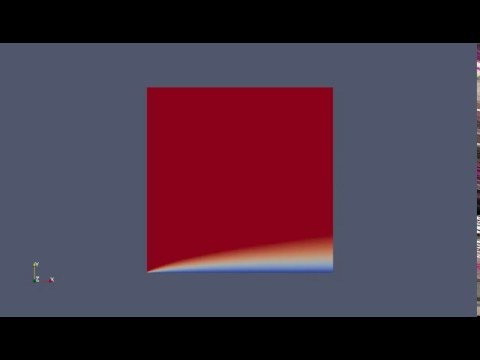

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("UfVrwEDqL2g")

Fig.2 - Contours of normalized streamwise velocity with the free stream velocity over a flat plate for Reynolds numbers of 100.

Fig. 2 visualizes the animation for temporal evoluation of the normalized streamwise velocity with free stream for flow with Reynolds numbers of 100. Flow enters the domain with normalized velocity of 1. Due to the imposed no slip boundary conditions on the flat plate, the velocity instantly decrease to zero at edge of the plate and the boundary layer starts to form and grows moving further downstream the plate. Increasing the order of magnitude for the Reynolds number, increases the effect of inertial forces over viscous forces, the thickness of boundary layer along the flat plate would decreases. This agrees with the general physics of this flow field, which states the local laminar boundary layer thickness (**&delta;**) is proportional to the inverse square root of local Reynolds number. Following video visualizes the formation of the laminar boundary along a flat plate for flow with Reynolds of 1e+5:

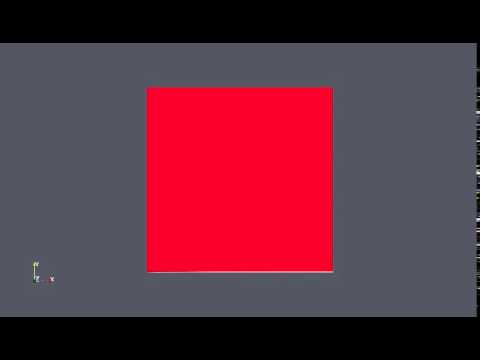

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("ohautyXJqWA")

Fig.2 - Contours of normalized streamwise velocity with the free stream velocity over a flat plate for Reynolds numbers of 1e+5.

It should also be highlighted that the above-visualized velocity contours are smooth. The smoothness confirms the validity of created mesh resolution and convergence of the numerical solution. However, this is only an additional necessary, but not sufficient criteria for simulation validity and convergence.

**After performing the general post-processing steps, the user need to perform more detail oriented post-processing to confirm the validity of the CFD simulation. This stage can be a state-of-the-art. Comparing the numerical results against the theory (discussed earlier) or any other available experimental results is the final stage of post-processing. It is extremely important to calculate the correct corresponding numerical variables and compare them against the experimental or other numerical data.**

For the problem of two dimensional laminar flow over a flat plate, users can visualize the variation of normalized streamwise velocity with the free stream (**U<sub>x**/**U<sub>0**) versus the similarity variable (**&eta;**). As discussed earlier in the physics section of this problem, if **U<sub>x**/**U<sub>0** is plotted versus non-dimensional similarity variable **&eta;**, instead of dimensional variables such as **u** and **y**, it should shows a universal curve for **any** Reynolds number and **any** position along the plate. Fig 3 visualizes the variation of **U<sub>x**/**U<sub>0** against **&eta;** for various Reynolds number at all point's within the CFD domain.

<img src="./Images/similarity_soln.png" width="500" align="middle">
</br>

Fig.3 - Variation of normalized streamwise velocity (**U<sub>x**/**U<sub>0**) against similarity variable (**&eta;**) for the flow over a flat plate for various Reynolds numbers.

Fig. 3 shows that the evolution of the normalized streamwise velocity, at any point for any Reynolds number, with respect to the similarity variable is in a good agreement with the trend discussed in the physics section. The interesting observation here is that as the Reynolds number of the flow increases the plotted curve matches the expected similarity solution better. The reason behind this observation is that increase in Reynolds number order of magnitude lead to decrease of boundary layer thickness, which is one of the most fundamental assumption of Blasius solution. Therefore, the visualized trend for flow with Re=1E+5 shown in Fig. 3 (i.e. black curve) is almost identical to the presented experimental results in physics section of this tutorial.

At this stage one can conclude that this CFD numerical simulation is validated to study laminar flow over a flat plate. For further validation one can visualize the variation of friction force/coefficient along the plate for different Reynolds number and compare the results against the corresponding theory. Therefore, it can be used for similar or more complex problems, such as flow with specified pressure gradient, non-uniform velocity profiles and etc.. This can be done via correct implementation in changing the corresponding boundary conditions.
